<a href="https://colab.research.google.com/github/Gaenariya/IPcolab/blob/main/6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/gdrive')
import cv2
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/gdrive


In [3]:
def saturation(val):
  if val > 255:
    return 255
  elif val < 0:
    return 0
  else:
    return val

(256, 256, 3)
(256, 256)


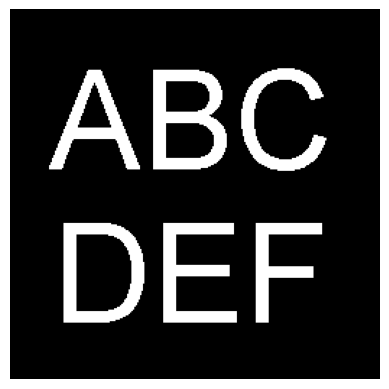

In [10]:
img = cv2.imread('/content/gdrive/My Drive/Images/abcdef.bmp')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gImg.shape)
plt.axis('off')
plt.imshow(gImg, cmap='gray')

In [7]:
gPoint = np.zeros((gImg.shape[0], gImg.shape[1]), dtype=np.uint8)

(256, 256, 3)
(256, 256)


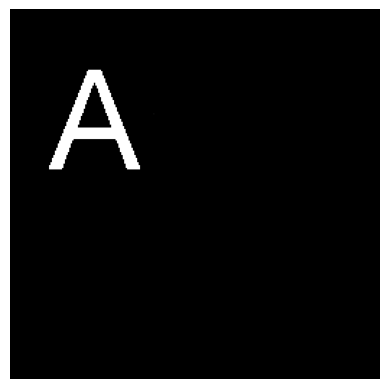

In [9]:
img = cv2.imread('/content/gdrive/My Drive/Images/a.bmp')
print(img.shape)
gImg2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gImg2.shape)
plt.axis('off')
plt.imshow(gImg2, cmap='gray')

/tmp/ipython-input-3614579443.py:4: RuntimeWarning: overflow encountered in scalar multiply
  gPoint[h, w] = saturation(gImg[h, w] * gImg2[h, w])


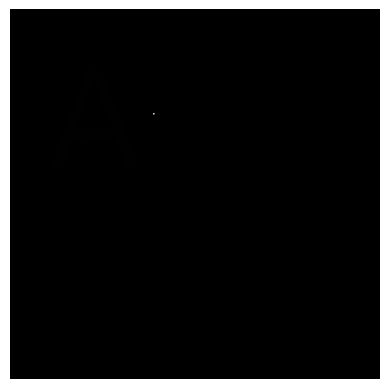

In [13]:
for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    #gPoint[h, w] = saturation(gImg[h, w] + gImg2[h, w])
    gPoint[h, w] = saturation(gImg[h, w] * gImg2[h, w])

plt.axis('off')
plt.imshow(gPoint, cmap='gray')

(256, 256, 3)
(256, 256)


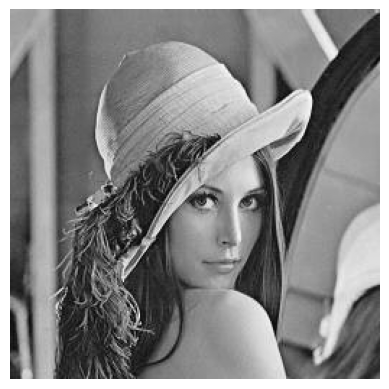

In [14]:
img = cv2.imread('/content/gdrive/My Drive/Images/lena256.jpg')
print(img.shape)
gImg4 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gImg4.shape)
plt.axis('off')
plt.imshow(gImg4, cmap='gray')

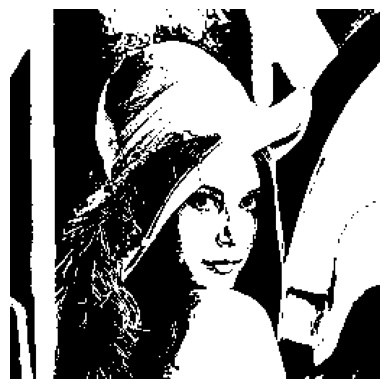

In [17]:
planeNum = 8
planeValue = 1

for i in range(planeNum - 1):
  planeValue *= 2

for h in range(gImg4.shape[0]):
  for w in range(gImg4.shape[1]):
    imValue = gImg4[h, w]
    imValue = (int)(imValue / planeValue)
    gPoint[h, w] = imValue * planeValue

plt.axis('off')
plt.imshow(gPoint, cmap='gray')

In [18]:
planeNum = 8
planeValue = 1

for i in range(planeNum - 1):
  planeValue *= 2

for h in range(gImg4.shape[0]):
  for w in range(gImg4.shape[1]):
    imValue = gImg4[h, w]
    imValue = (int)(imValue / planeValue)
    if(imValue % 2 == 0):
      imValue = 0
    else:
      imValue = 255
    gPoint[h, w] = imValue * planeValue

plt.axis('off')
plt.imshow(gPoint, cmap='gray')

OverflowError: Python integer 32640 out of bounds for uint8

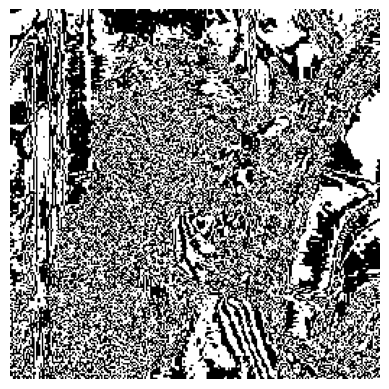

In [20]:
planeNum = 4
planeValue = 1

# planeValue 계산
for i in range(planeNum - 1):
  planeValue *= 2

# gPoint 초기화 (오류 원인 중 하나였음)
gPoint = np.zeros((gImg4.shape[0], gImg4.shape[1]), dtype=np.uint8)

# 비트 검사 및 값 설정
for h in range(gImg4.shape[0]):
  for w in range(gImg4.shape[1]):
    imValue = gImg4[h, w]
    imValue = int(imValue / planeValue)
    if imValue % 2 == 0:
      imValue = 0
    else:
      imValue = 255
    gPoint[h, w] = imValue  # ← planeValue 곱하면 값 범위 초과할 수 있으므로 제거

plt.axis('off')
plt.imshow(gPoint, cmap='gray')


In [21]:
gWaterMarker = gImg4.copy()

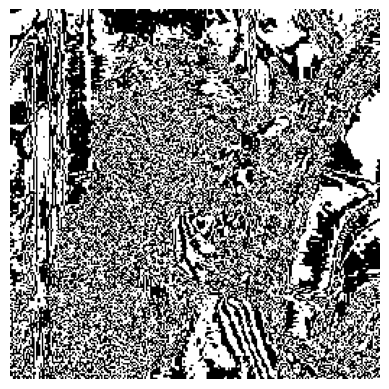

In [25]:
for h in range(gImg4.shape[0]):
  for w in range(gImg4.shape[1]):
    imValue = gImg2[h, w]
    if imValue >= 128:
      if gWaterMarker[h, w] % 2 == 0:
        gWaterMarker[h, w] += 1
    else:
      if gWaterMarker[h, w] % 2 == 1:
        gWaterMarker[h, w] -= 1

plt.axis('off')
plt.imshow(gPoint, cmap='gray')
